# MONDRIAN FOREST: APPLICATION TO 3D BLOBS DATASET

In [1]:
cd  "C:\Users\silvi\Desktop\Fisica\TESI\tesi"

C:\Users\silvi\Desktop\Fisica\TESI\tesi


In [2]:
from sklearn import datasets
import pandas as pd
import pylab as plt
%matplotlib notebook
import numpy as np

import Mondrian
import Plot

## Blobs dataset:

In [4]:
blobs = datasets.make_blobs(n_samples=30,n_features=3,cluster_std=[1.0, 2, 0.5],random_state=50)
X = blobs[0]
y = blobs[1]

In [5]:
df_blobs = {'X1':X[:,0],'X2':X[:,1],'X3':X[:,2],'y':y}
df_blobs = pd.DataFrame(df_blobs)
df_blobs.head()

,X1,X2,X3,y
0,-0.422263,-4.695727,11.725109,1
1,-3.748338,-3.718688,14.523919,1
2,0.647538,-5.505340,-3.212045,0
3,0.205082,-4.633204,-5.021534,0
4,0.221164,-4.706445,-4.728126,0


<IPython.core.display.Javascript object>


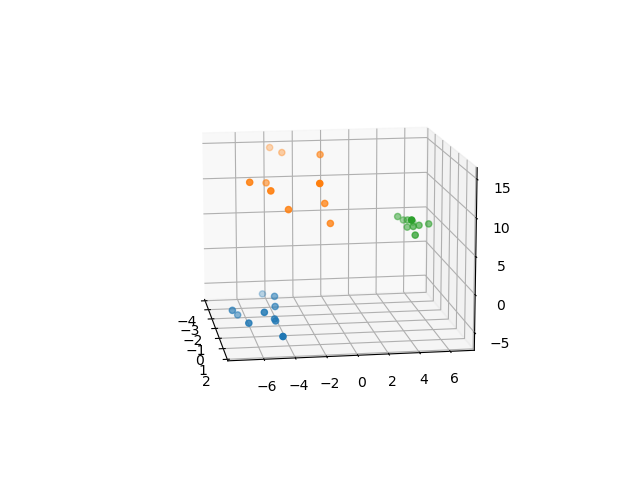

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df_blobs.query('y==0')['X1'],df_blobs.query('y==0')['X2'],df_blobs.query('y==0')['X3'])
ax.scatter(df_blobs.query('y==1')['X1'],df_blobs.query('y==1')['X2'],df_blobs.query('y==1')['X3'])
ax.scatter(df_blobs.query('y==2')['X1'],df_blobs.query('y==2')['X2'],df_blobs.query('y==2')['X3'])

In [7]:
import Matrix
data_index,cut_matrix,point_cut_distance = Matrix.cut_ensemble(X)

In [8]:
data_index.head()

,0,1,2,index
0,-0.422263,-4.695727,11.725109,0
1,-3.748338,-3.718688,14.523919,1
2,0.647538,-5.505340,-3.212045,2
3,0.205082,-4.633204,-5.021534,3
4,0.221164,-4.706445,-4.728126,4


In [9]:
print('number of hyperplanes: ',len(cut_matrix))
cut_matrix.head()

number of hyperplanes:  435


,index1,index2,cut_index,magnitude_norm_vect,norm_vect_0,norm_vect_1,norm_vect_2,equivalent_cut_index
0,1,0,0,8.878700,-0.746524,0.219293,0.628182,0
1,2,0,1,-3.956084,0.071333,-0.053984,-0.995991,1
2,2,1,2,-5.386175,0.239430,-0.097314,-0.966024,2
3,3,0,3,-3.370882,0.037434,0.003731,-0.999292,1
4,3,1,4,-4.811548,0.198045,-0.045812,-0.979122,3


In [10]:
print('number of rows = number of samples = ',len(point_cut_distance))
print('number of columns = number of hyperplanes + 1 = ',len(point_cut_distance.columns))
point_cut_distance.head()

number of rows = number of samples =  30
number of columns = number of hyperplanes + 1 =  436


,cut_index_0,cut_index_1,cut_index_2,cut_index_3,cut_index_4,cut_index_5,cut_index_6,cut_index_7,cut_index_8,cut_index_9,...,cut_index_426,cut_index_427,cut_index_428,cut_index_429,cut_index_430,cut_index_431,cut_index_432,cut_index_433,cut_index_434,point_index
0,-2.227707,-7.498642,-5.584712,-8.379253,-6.537266,-13.595780,-8.232907,-6.383363,-13.082167,16.055537,...,8.547167,-0.743492,8.963027,8.609917,7.505184,-1.392937,9.696985,-3.082634,8.821488,0
1,2.227707,-10.576234,-9.179873,-11.296947,-9.981115,-14.928236,-11.160187,-9.840908,-14.239922,18.354263,...,7.927305,-4.020980,12.205757,7.909715,6.176219,-4.728944,12.517484,-5.333309,8.034266,1
2,-12.587131,7.498642,9.179873,6.584355,8.336986,-1.028426,6.735166,8.484019,-0.882967,1.836142,...,4.962010,14.148328,-4.767556,5.507210,5.899538,12.148911,-4.076759,7.391434,6.215829,2
3,-13.202262,9.222233,10.737076,8.379253,9.981115,1.028426,8.525415,10.120990,1.171879,-0.151419,...,3.522437,15.881352,-5.939797,4.119070,4.632034,13.879030,-5.348070,9.136139,4.881202,3
4,-13.046015,8.935102,10.464614,8.086381,9.700373,0.735789,8.232907,9.840908,0.882967,0.151419,...,3.682667,15.592854,-5.713732,4.270562,4.757960,13.599664,-5.114588,8.882614,5.023615,4


## MONDRIAN CLUSTERING FOREST

In [11]:
# parameter setting
t0 = 0
lifetime = 5
exp = 5
metric = 'min_corr'  # 'variance','centroid_diff','centroid_ratio','min'

In [13]:
# the forest consists of 5 trees
number_of_iterations = 3
data,list_part,list_m,list_p_tot,list_classified_data,ami_mean,ami_std,ami_tot = Mondrian.mondrian_forest(X,t0,lifetime,exp,metric,number_of_iterations)

Tree number 1
PARTITIONING:
total number of splits: 19
MERGING:
range of possible number of clusters: 1-10
Tree number 2
PARTITIONING:
total number of splits: 17
MERGING:
range of possible number of clusters: 1-12
Tree number 3
PARTITIONING:
total number of splits: 19
MERGING:
range of possible number of clusters: 1-10


The objects given as output of each tree are stored as elements of *list_part*, *list_m*, *list_p_tot*, *list_classified_data* (each index refers to a tree). *ami_tot* is a list of lists storing the adjusted mutual information computed for each pair of tree outcome and for each possible division into clusters (each element of the list corresponds to a specific pair of trees). *ami_mean* and *ami_std* are lists storing the ami averaged values and standard deviations (one value for each possible division).

### DETERMINATION OF THE NUMBER OF CLUSTERS

Plot of the averaged AMI coefficient vs the number of clusters.

<IPython.core.display.Javascript object>


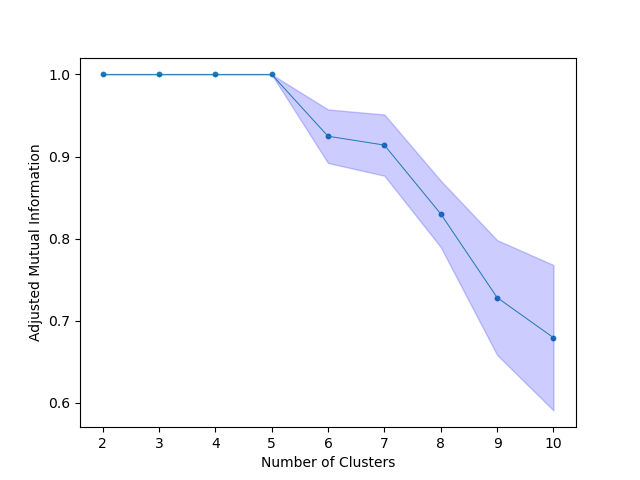

In [14]:
Plot.plot_AMI(ami_mean,ami_std)

### PLOT OF SINGLE TREE RESULTS

#### DATA CLASSIFICATION PLOT

<IPython.core.display.Javascript object>


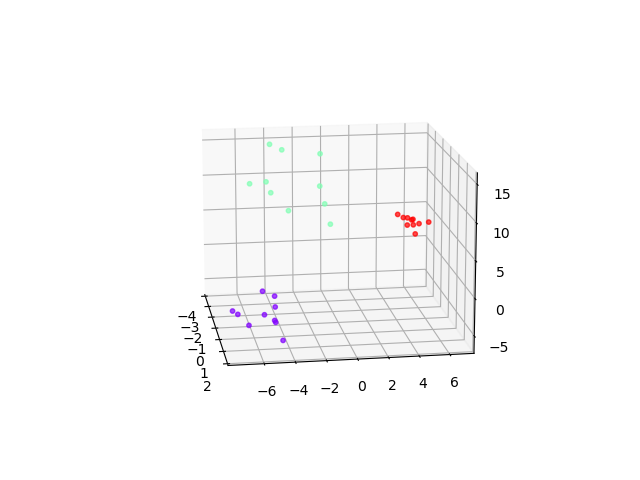

<IPython.core.display.Javascript object>


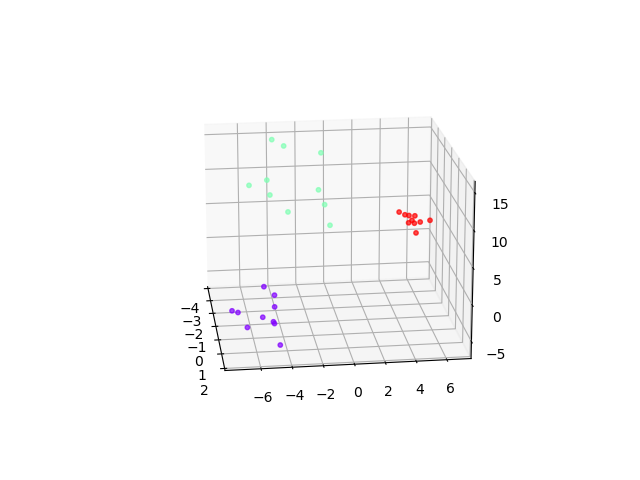

<IPython.core.display.Javascript object>


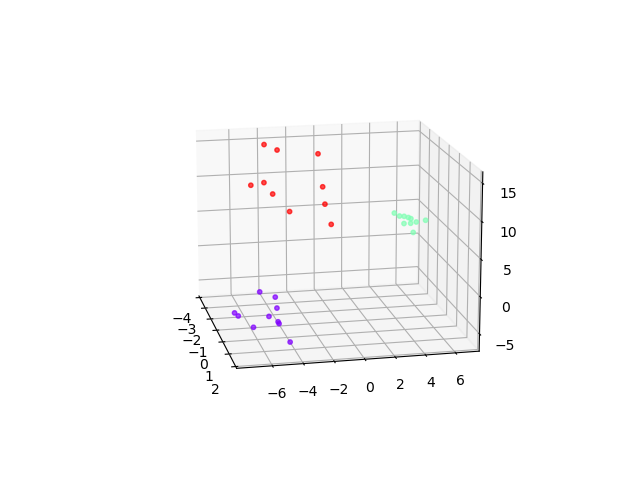

In [17]:
number_of_clusters = 3
for k in range(number_of_iterations):
    part = list_part[k]
    list_p = list_p_tot[k]
    classified_data = list_classified_data[k]
    Plot.plot3D(data,part,list_p,classified_data,number_of_clusters,True,False)

#### SPACE CLASSIFICATION PLOT

In [18]:
# select a specific tree output 
k = 0
part = list_part[k]
m = list_m[k]
list_p = list_p_tot[k]
classified_data = list_classified_data[k]

<IPython.core.display.Javascript object>


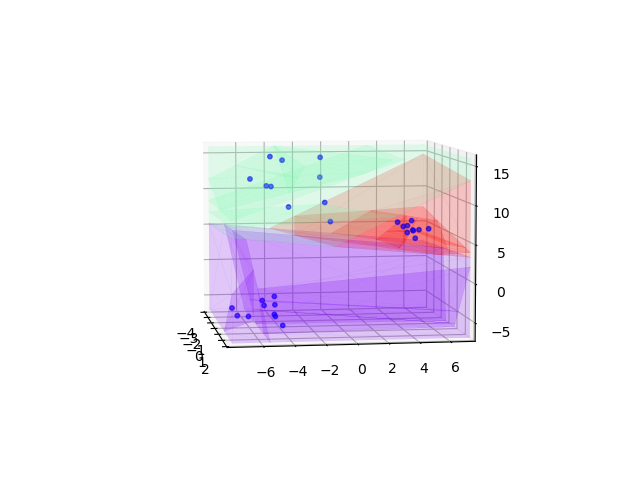

<IPython.core.display.Javascript object>


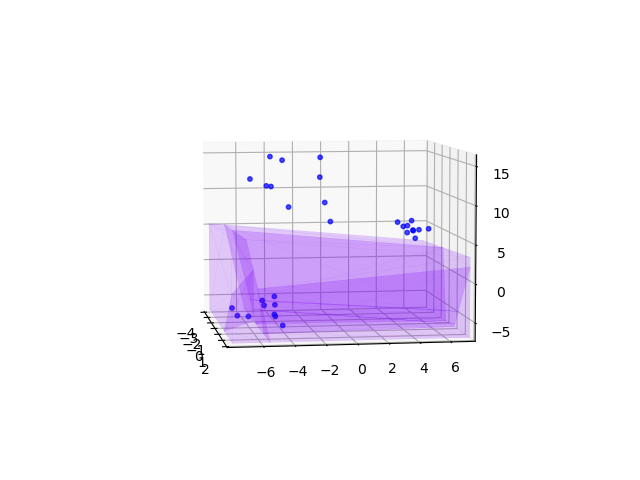

<IPython.core.display.Javascript object>


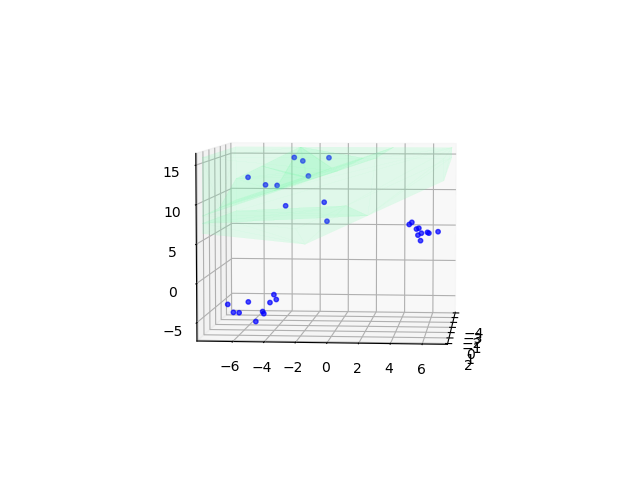

<IPython.core.display.Javascript object>


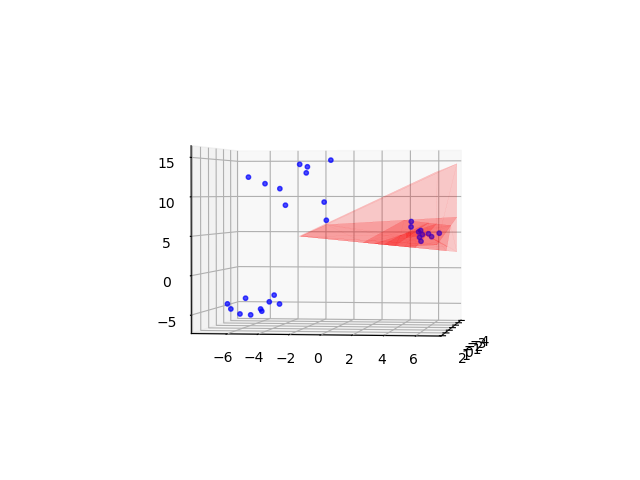

In [19]:
number_of_clusters = 3
Plot.plot3D(data,part,list_p,list_classified_data,number_of_clusters,False,True)